In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# ==========================================================
# 0. 初期設定
# ==========================================================
base_dir = r"C:\1BelltreeTech\Python\AI-Olympic"
file_female = os.path.join(base_dir, "Woman.csv")
file_male = os.path.join(base_dir, "Man.csv")
file_studet = os.path.join(base_dir, "Student.csv")
file_parent = os.path.join(base_dir, "Parent.csv")


# ==========================================================
# 1. データ読み込み
# ==========================================================
def load_csv_safe(filepath):
    if not os.path.exists(filepath):
        print(f"❌ ファイルが見つかりません: {filepath}")
        return None
    for enc in ["utf-8", "shift_jis", "cp932"]:
        try:
            return pd.read_csv(filepath, encoding=enc)
        except:
            continue
    return None


df_f = load_csv_safe(file_female)
df_m = load_csv_safe(file_male)

# ==========================================================
# 2. Studentのt検定 (全項目)
# ==========================================================
if df_f is not None and df_m is not None:
    print("✅ データ読み込み成功。Studentのt検定を実行します...\n")

    target_columns = [
        col
        for col in df_f.columns
        if "部活動" not in col and "No" not in col and "AZA" not in col
    ]
    results = []

    for col in target_columns:
        if col not in df_m.columns:
            continue

        # 数値変換とクリーニング (1-4スケール)
        d_f = pd.to_numeric(df_f[col], errors="coerce")
        d_m = pd.to_numeric(df_m[col], errors="coerce")
        d_f = d_f[(d_f >= 1) & (d_f <= 4)].dropna()
        d_m = d_m[(d_m >= 1) & (d_m <= 4)].dropna()

        if len(d_f) < 2 or len(d_m) < 2:
            continue

        # -------------------------------------------------------
        # 【変更点】 Studentのt検定 (equal_var=True)
        # -------------------------------------------------------
        t_stat, p_val = stats.ttest_ind(d_f, d_m, equal_var=True)

        results.append(
            {
                "項目名": col,
                "女子平均": round(d_f.mean(), 2),
                "男子平均": round(d_m.mean(), 2),
                "t値": round(t_stat, 2),
                "p値": p_val,  # ソート用にそのまま保持
                "判定": "有意差あり (*)" if p_val < 0.05 else "差なし",
            }
        )

    # ==========================================================
    # 3. 結果表示
    # ==========================================================
    df_res = pd.DataFrame(results)

    # p値の低い順にソート
    df_res = df_res.sort_values("p値")

    # 表示設定
    pd.set_option("display.max_rows", None)

    print(f"📊 分析対象項目数: {len(df_res)}")
    print("-" * 80)
    print("検定手法: Studentのt検定 (等分散を仮定)")
    print("※数値は「1.0」に近いほど「そう思う（同意）」を表します。")
    print("-" * 80)

    # p値を読みやすくフォーマットして表示
    df_display = df_res.copy()
    df_display["p値"] = df_display["p値"].apply(
        lambda x: f"{x:.5f}" if isinstance(x, float) else x
    )

    try:
        display(df_display)
    except NameError:
        print(df_display.to_string(index=False))

else:
    print("⛔ データ読み込みエラー")

✅ データ読み込み成功。Studentのt検定を実行します...

📊 分析対象項目数: 19
--------------------------------------------------------------------------------
検定手法: Studentのt検定 (等分散を仮定)
※数値は「1.0」に近いほど「そう思う（同意）」を表します。
--------------------------------------------------------------------------------


,項目名,女子平均,男子平均,t値,p値,判定
1,母は、何かと私に相談する,2.21,2.77,-4.66,0.00000,有意差あり (*)
7,父のようになりたい,2.59,2.20,3.08,0.00224,有意差あり (*)
15,父から、人に親切にすることを教わった,2.28,1.93,2.74,0.00652,有意差あり (*)
10,母は、私のすることに何かと口出しする,2.44,2.18,2.42,0.01603,有意差あり (*)
5,母を尊敬している,1.56,1.81,-2.31,0.02128,有意差あり (*)
3,母とうまくいっている,1.46,1.65,-2.01,0.04500,有意差あり (*)
4,父を尊敬している,2.03,1.82,1.80,0.07224,差なし
17,父は自分にとって怖い存在だ,3.20,3.00,1.73,0.08529,差なし
13,父は、私のいうことならなんでも聞いてくれる,2.42,2.58,-1.49,0.13701,差なし
8,母のようになりたい,2.14,2.30,-1.25,0.21188,差なし


✅ データ読み込み成功。親データを分割します...
  - 父の回答数: 75
  - 母の回答数: 301

🔍 父 vs 生徒(対父) の分析中...
🔍 母 vs 生徒(対母) の分析中...

✨ 親子間の認識ギャップ (有意差ありのみ表示)
※数値は「1.0」に近いほど「そう思う（同意）」


,対象,項目,生徒平均,親平均,p値
4,母,子どもはあなたのようになりたい,2.207101,2.956811,0.00000
2,母,子どもはあなたを尊敬している,1.748538,2.348837,0.00000
7,母,あなたは、子どものいうことならなんでも聞く,2.523529,2.897010,0.00000
3,父,子どもはあなたのようになりたい,2.238095,2.853333,0.00000
0,母,子どもは、何かとあなたに相談する,2.608187,2.282392,0.00004
9,母,あなたは子どもにとって怖い存在だ,3.076023,2.754153,0.00018
8,父,あなたは子どもにとって怖い存在だ,2.958580,2.440000,0.00025
1,母,あなたは子どもとうまくいっている,1.561404,1.790698,0.00040
2,父,子どもはあなたを尊敬している,1.810651,2.253333,0.00054
0,父,子どもは、何かとあなたに相談する,3.011834,2.613333,0.00238


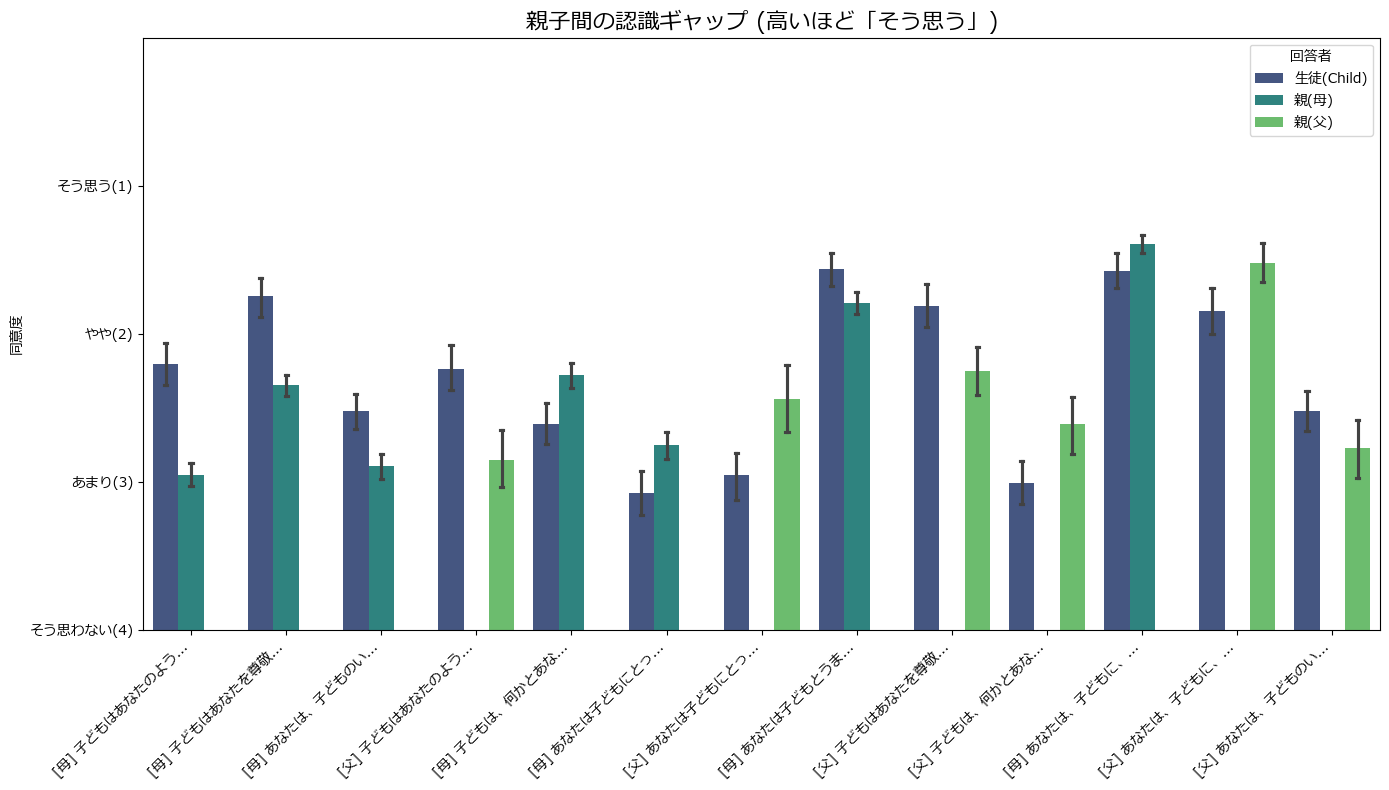

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 日本語フォント設定
plt.rcParams["font.family"] = "Meiryo"

# ==========================================================
# 0. 初期設定 & データ読み込み
# ==========================================================
base_dir = r"C:\1BelltreeTech\Python\AI-Olympic"
file_student = os.path.join(base_dir, "Student.csv")
file_parent = os.path.join(base_dir, "Parent.csv")


def load_csv_safe(filepath):
    if not os.path.exists(filepath):
        print(f"❌ ファイルが見つかりません: {filepath}")
        return None
    for enc in ["utf-8", "shift_jis", "cp932"]:
        try:
            return pd.read_csv(filepath, encoding=enc)
        except:
            continue
    return None


df_student = load_csv_safe(file_student)
df_parent = load_csv_safe(file_parent)

# ==========================================================
# 1. 前処理: 親データを父と母に分割
# ==========================================================
if df_student is not None and df_parent is not None:
    print("✅ データ読み込み成功。親データを分割します...")

    # 親データの「あなたは父、母どちらですか」列を使って分割
    # ※列名が正確か確認が必要だが、ユーザー提示のcsvに合わせて推定
    parent_type_col = "あなたは父、母どちらですか"

    if parent_type_col in df_parent.columns:
        df_father = df_parent[df_parent[parent_type_col].astype(str).str.contains("父")]
        df_mother = df_parent[df_parent[parent_type_col].astype(str).str.contains("母")]
        print(f"  - 父の回答数: {len(df_father)}")
        print(f"  - 母の回答数: {len(df_mother)}")
    else:
        print(f"⛔ エラー: 親データに '{parent_type_col}' 列が見つかりません。")
        df_father = pd.DataFrame()
        df_mother = pd.DataFrame()

    # ==========================================================
    # 2. 質問対応ペアの定義 (Mapping)
    # ==========================================================
    # {親の質問: [生徒(対父)の質問, 生徒(対母)の質問]}
    # ※生徒側に質問がない場合は None にする
    question_map = {
        "子どもは、何かとあなたに相談する": [
            "父は、何かと私に相談する",
            "母は、何かと私に相談する",
        ],
        "あなたは子どもとうまくいっている": [
            "父とうまくいっている",
            "母とうまくいっている",
        ],
        "子どもはあなたを尊敬している": ["父を尊敬している", "母を尊敬している"],
        "あなたは子どもに期待している": [
            None,
            "母は私に期待している",
        ],  # 父への期待質問が生徒側にない場合
        "子どもはあなたのようになりたい": ["父のようになりたい", "母のようになりたい"],
        "あなたは、子どものすることに何かと口出しする": [
            "父は、私のすることに何かと口出しする",
            "母は、私のすることに何かと口出しする",
        ],
        "あなたは、子どもにあまりかまわない": [
            "父は、私にあまりかまわない",
            "母は、私にあまりかまわない",
        ],
        "あなたは、子どものいうことならなんでも聞く": [
            "父は、私のいうことならなんでも聞いてくれる",
            "母は、私のいうことならなんでも聞いてくれる",
        ],
        "あなたは、子どもに、人に親切にすることを教えた": [
            "父から、人に親切にすることを教わった",
            "母から、人に親切にすることを教わった",
        ],
        "あなたは子どもにとって怖い存在だ": [
            "父は自分にとって怖い存在だ",
            "母は自分にとって怖い存在だ",
        ],
    }

    # ==========================================================
    # 3. 分析実行関数
    # ==========================================================
    def analyze_gap(df_s, df_p, role_name, q_map_idx):
        """
        df_s: 生徒データ
        df_p: 親データ(父or母)
        role_name: "父" or "母"
        q_map_idx: 0(対父) or 1(対母)
        """
        results = []
        for p_col, s_cols in question_map.items():
            s_col = s_cols[q_map_idx]

            # カラムが存在するかチェック
            if p_col not in df_p.columns:
                continue
            if s_col is None or s_col not in df_s.columns:
                continue

            # 数値変換 (1-4)
            d_p = pd.to_numeric(df_p[p_col], errors="coerce")
            d_s = pd.to_numeric(df_s[s_col], errors="coerce")
            d_p = d_p[(d_p >= 1) & (d_p <= 4)].dropna()
            d_s = d_s[(d_s >= 1) & (d_s <= 4)].dropna()

            if len(d_p) < 2 or len(d_s) < 2:
                continue

            # T検定 (Student's t-test: equal_var=True)
            t_stat, p_val = stats.ttest_ind(d_s, d_p, equal_var=True)

            results.append(
                {
                    "項目": p_col,  # 親側の質問文を代表名とする
                    "対象": role_name,
                    "生徒平均": d_s.mean(),
                    "親平均": d_p.mean(),
                    "GAP (親-生徒)": d_p.mean() - d_s.mean(),
                    "p値": p_val,
                    "判定": "有意差あり" if p_val < 0.05 else "",
                }
            )
        return pd.DataFrame(results)

    # 父とのギャップ分析
    print("\n🔍 父 vs 生徒(対父) の分析中...")
    df_res_father = analyze_gap(df_student, df_father, "父", 0)

    # 母とのギャップ分析
    print("🔍 母 vs 生徒(対母) の分析中...")
    df_res_mother = analyze_gap(df_student, df_mother, "母", 1)

    # 結合して表示
    df_all = pd.concat([df_res_father, df_res_mother])

    # ==========================================================
    # 4. 結果表示 & グラフ化
    # ==========================================================
    # 有意差があるものだけ抽出
    df_sig = df_all[df_all["判定"] == "有意差あり"].sort_values("p値")

    if not df_sig.empty:
        print("\n" + "=" * 80)
        print("✨ 親子間の認識ギャップ (有意差ありのみ表示)")
        print("=" * 80)
        print("※数値は「1.0」に近いほど「そう思う（同意）」")

        display_cols = ["対象", "項目", "生徒平均", "親平均", "p値"]
        # p値をフォーマット
        df_disp = df_sig.copy()
        df_disp["p値"] = df_disp["p値"].apply(lambda x: f"{x:.5f}")

        try:
            display(df_disp[display_cols])
        except:
            print(df_disp[display_cols].to_string(index=False))

        # グラフ化 (反転スコア: 高いほど同意)
        plt.figure(figsize=(14, 8))

        # データの整形
        plot_data = []
        for index, row in df_sig.iterrows():
            role = row["対象"]
            q_parent = row["項目"]
            # 生徒側の質問名を取得
            idx = 0 if role == "父" else 1
            q_student = question_map[q_parent][idx]

            # 生徒データ
            vals_s = pd.to_numeric(df_student[q_student], errors="coerce").dropna()
            vals_s = vals_s[(vals_s >= 1) & (vals_s <= 4)]
            # 親データ
            vals_p = pd.to_numeric(
                df_father[q_parent] if role == "父" else df_mother[q_parent],
                errors="coerce",
            ).dropna()
            vals_p = vals_p[(vals_p >= 1) & (vals_p <= 4)]

            # 反転 (5 - val)
            df_s_temp = pd.DataFrame(
                {
                    "Score": 5 - vals_s,
                    "Group": "生徒(Child)",
                    "Question": f"[{role}] {q_parent[:10]}...",
                }
            )
            df_p_temp = pd.DataFrame(
                {
                    "Score": 5 - vals_p,
                    "Group": f"親({role})",
                    "Question": f"[{role}] {q_parent[:10]}...",
                }
            )
            plot_data.append(pd.concat([df_s_temp, df_p_temp]))

        df_plot = pd.concat(plot_data)

        # 描画
        sns.barplot(
            data=df_plot,
            x="Question",
            y="Score",
            hue="Group",
            errorbar=("ci", 95),
            capsize=0.1,
            palette="viridis",
        )

        plt.title("親子間の認識ギャップ (高いほど「そう思う」)", fontsize=16)
        plt.yticks(
            [1, 2, 3, 4], ["そう思わない(4)", "あまり(3)", "やや(2)", "そう思う(1)"]
        )
        plt.ylim(1, 5)
        plt.xlabel("")
        plt.ylabel("同意度")
        plt.xticks(rotation=45, ha="right")
        plt.legend(title="回答者")
        plt.tight_layout()
        plt.show()

    else:
        print(
            "有意差は見つかりませんでした。親子は完全に分かり合っているようです（稀有な例です）。"
        )

else:
    print("⛔ データ読み込みエラー")

In [ ]:
import pandas as pd
import os

# ==========================================================
# 0. 設定 (Settings)
# ==========================================================
# ファイルのパス（お前の環境に合わせて指定）
base_dir = r"C:\1BelltreeTech\Python\AI-Olympic"
input_file = os.path.join(base_dir, "Parent.csv")
output_father = os.path.join(base_dir, "Father.csv")
output_mother = os.path.join(base_dir, "Mother.csv")


# ==========================================================
# 1. データ読み込み (Load Data)
# ==========================================================
def load_csv_safe(filepath):
    if not os.path.exists(filepath):
        print(f"❌ ファイルが見つかりません: {filepath}")
        return None
    for enc in ["utf-8", "shift_jis", "cp932"]:
        try:
            return pd.read_csv(filepath, encoding=enc)
        except:
            continue
    print(f"❌ 読み込み失敗 (文字コードエラー): {filepath}")
    return None


df = load_csv_safe(input_file)

# ==========================================================
# 2. 分割と保存 (Split and Save)
# ==========================================================
if df is not None:
    target_col = "あなたは父、母どちらですか"

    if target_col in df.columns:
        # 父データ抽出
        df_father = df[df[target_col] == "父"]
        # 母データ抽出
        df_mother = df[df[target_col] == "母"]

        # 保存 (encoding='utf-8_sig' でExcelでの文字化け防止)
        df_father.to_csv(output_father, index=False, encoding="utf-8_sig")
        df_mother.to_csv(output_mother, index=False, encoding="utf-8_sig")

        print(f"✅ 分割完了！")
        print(f"  - 父データ: {len(df_father)}件 -> {output_father}")
        print(f"  - 母データ: {len(df_mother)}件 -> {output_mother}")

    else:
        print(
            f"⛔ エラー: '{target_col}' という列が見つかりません。列名を確認してください。"
        )
else:
    print("⛔ 処理を中断します。")

✅ 分割完了！
  - 父データ: 75件 -> C:\1BelltreeTech\Python\AI-Olympic\Father.csv
  - 母データ: 301件 -> C:\1BelltreeTech\Python\AI-Olympic\Mother.csv


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# ==========================================================
# ⚙️ 設定エリア (ここだけ変えれば動く)
# ==========================================================
BASE_DIR = r"C:\1BelltreeTech\Python\AI-Olympic"

# 比較したい2つのファイルを指定
# 例: 生徒 vs 親(父) をやりたい場合
FILE_A = os.path.join(BASE_DIR, "Student.csv")
FILE_B = os.path.join(BASE_DIR, "Father.csv")  # ※事前に分割しておいたファイル

# 結果を保存するファイル名
OUTPUT_CSV = "ttest_result_matrix.csv"


# ==========================================================
# 🛠️ 汎用関数群 (ロジック本体)
# ==========================================================
def load_csv_universal(filepath):
    """どんなCSVでも読み込む"""
    if not os.path.exists(filepath):
        print(f"❌ ファイルが見つかりません: {filepath}")
        return None
    for enc in ["utf-8", "shift_jis", "cp932"]:
        try:
            return pd.read_csv(filepath, encoding=enc)
        except:
            continue
    print(f"❌ 読み込み失敗: {filepath}")
    return None


def run_brute_force_ttest(file_a, file_b, output_file):
    """
    2つのファイルの全数値列について、総当たりでT検定を行う
    """
    print(f"\n🚀 分析開始: {os.path.basename(file_a)} vs {os.path.basename(file_b)}")

    df_a = load_csv_universal(file_a)
    df_b = load_csv_universal(file_b)

    if df_a is None or df_b is None:
        return

    # 数値列のみ抽出 ( "No" などのID列っぽいものは除外設定も可だが、今回は全部やる)
    # object型(文字)を除外し、数値型だけ残す
    cols_a = df_a.select_dtypes(include=[np.number]).columns.tolist()
    cols_b = df_b.select_dtypes(include=[np.number]).columns.tolist()

    # ID列などの明らかなノイズを除去（必要に応じて調整）
    cols_a = [c for c in cols_a if "No" not in c and "ID" not in c]
    cols_b = [c for c in cols_b if "No" not in c and "ID" not in c]

    print(f"  - File A 数値列数: {len(cols_a)}")
    print(f"  - File B 数値列数: {len(cols_b)}")
    print(f"  - 総組み合わせ数: {len(cols_a) * len(cols_b)} パターン")

    results = []

    # 総当たりループ (Matrix)
    for col_a in cols_a:
        for col_b in cols_b:
            # データ取得 & クリーニング (1-4など範囲外は考慮せず、あるがままを検定)
            # ※ただし欠損値は除去
            data_a = df_a[col_a].dropna()
            data_b = df_b[col_b].dropna()

            # データが少なすぎる場合はスキップ
            if len(data_a) < 2 or len(data_b) < 2:
                continue

            # Studentのt検定 (等分散仮定)
            t_stat, p_val = stats.ttest_ind(data_a, data_b, equal_var=True)

            results.append(
                {
                    "FileA_Column": col_a,
                    "FileB_Column": col_b,
                    "Mean_A": round(data_a.mean(), 4),
                    "Mean_B": round(data_b.mean(), 4),
                    "Diff": round(data_a.mean() - data_b.mean(), 4),
                    "p_value": p_val,
                    "Significant": "Yes (*)" if p_val < 0.05 else "",
                }
            )

    # 結果保存
    if results:
        df_res = pd.DataFrame(results)
        # p値が小さい順（有意差が強い順）にソート
        df_res = df_res.sort_values("p_value")

        # CSV保存
        save_path = os.path.join(BASE_DIR, output_file)
        df_res.to_csv(save_path, index=False, encoding="utf-8_sig")

        print("\n" + "=" * 80)
        print(f"✅ 計算完了。結果を保存しました: {output_file}")
        print("=" * 80)

        # 上位10件を表示 (有意なもの)
        print("📊 [Top 10 Significant Pairs]")
        df_display = df_res[df_res["Significant"] != ""].head(10)

        # 表示用フォーマット
        pd.set_option("display.max_columns", None)
        pd.set_option("display.width", 1000)
        df_display["p_value"] = df_display["p_value"].apply(lambda x: f"{x:.5f}")

        try:
            display(
                df_display[
                    [
                        "FileA_Column",
                        "FileB_Column",
                        "p_value",
                        "Mean_A",
                        "Mean_B",
                        "Significant",
                    ]
                ]
            )
        except NameError:
            print(
                df_display[
                    [
                        "FileA_Column",
                        "FileB_Column",
                        "p_value",
                        "Mean_A",
                        "Mean_B",
                        "Significant",
                    ]
                ].to_string(index=False)
            )

    else:
        print("⚠️ 検定可能な数値データがありませんでした。")


# ==========================================================
# 🚀 実行 (Execute)
# ==========================================================

# 2. 総当たり検定実行 (生徒 vs 父)
#    ※FILE_B を "Mother.csv" に変えれば母との比較になる
run_brute_force_ttest(FILE_A, FILE_B, OUTPUT_CSV)


🚀 分析開始: Student.csv vs Father.csv
  - File A 数値列数: 20
  - File B 数値列数: 10
  - 総組み合わせ数: 200 パターン

✅ 計算完了。結果を保存しました: ttest_result_matrix.csv
📊 [Top 10 Significant Pairs]


,FileA_Column,FileB_Column,p_value,Mean_A,Mean_B,Significant
138,母は、私にあまりかまわない,あなたは、子どもに、人に親切にすることを教えた,0.00000,3.2222,1.5200,Yes (*)
133,母は、私にあまりかまわない,あなたは子どもに期待している,0.00000,3.2222,1.6933,Yes (*)
36,母とうまくいっている,あなたは、子どもにあまりかまわない,0.00000,1.5614,3.0267,Yes (*)
131,母は、私にあまりかまわない,あなたは子どもとうまくいっている,0.00000,3.2222,1.7867,Yes (*)
128,父は、私にあまりかまわない,あなたは、子どもに、人に親切にすることを教えた,0.00000,2.9941,1.5200,Yes (*)
176,母から、人に親切にすることを教わった,あなたは、子どもにあまりかまわない,0.00000,1.5765,3.0267,Yes (*)
198,母は自分にとって怖い存在だ,あなたは、子どもに、人に親切にすることを教えた,0.00000,3.0760,1.5200,Yes (*)
8,父は、何かと私に相談する,あなたは、子どもに、人に親切にすることを教えた,0.00000,3.0118,1.5200,Yes (*)
34,母とうまくいっている,子どもはあなたのようになりたい,0.00000,1.5614,2.8533,Yes (*)
123,父は、私にあまりかまわない,あなたは子どもに期待している,0.00000,2.9941,1.6933,Yes (*)
